In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
root = '/project/wyin/jlee/ml-project'
util_loc = '/project/wyin/jlee/ml-project/utils'
sys.path.append(util_loc)
from utilities import UnscaledData
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
data = UnscaledData(os.path.join(root, 'inverse-partial/data'), X_name = "params", y_name = "l_params")

all_params = np.concatenate((data.train_X, data.val_X, data.test_X))
l_params = np.concatenate((data.train_y, data.val_y, data.test_y))
print(all_params.shape)
print(l_params.shape)

(31875, 3)
(31875, 3)


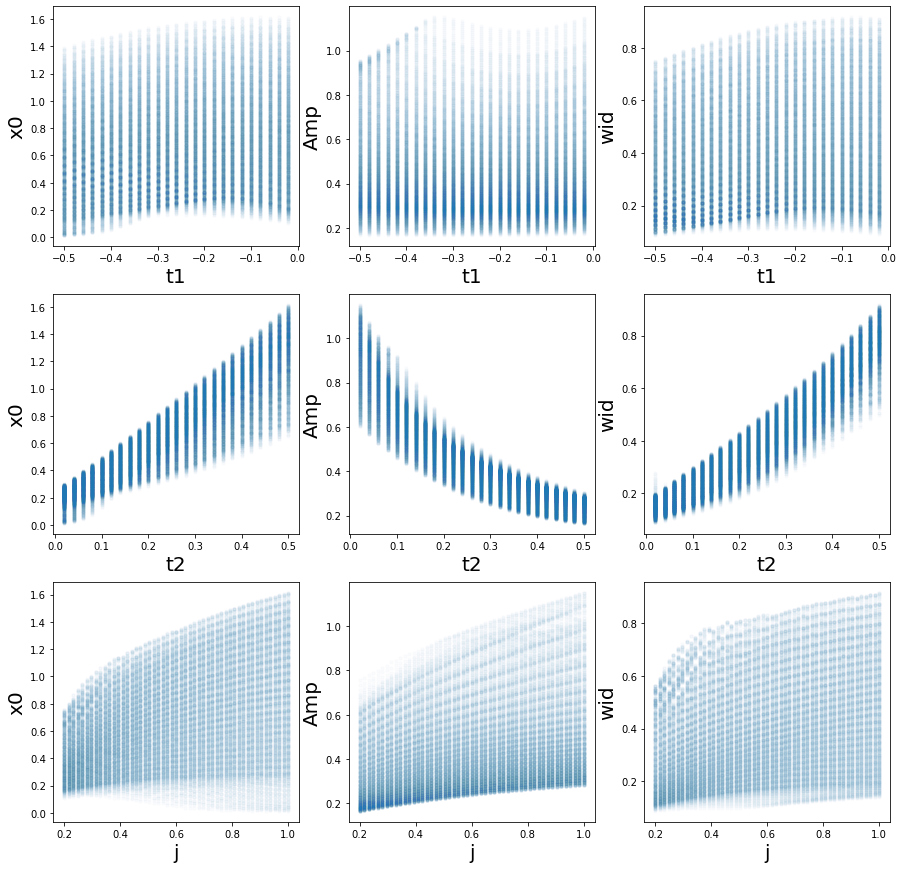

In [8]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
x_labels = ['t1', 't2', 'j']
y_labels = ['x0', 'Amp', 'wid']
for i in range(3):
    for j in range(3):
        ax[i,j].scatter(params[:,i], l_params[:,j], alpha = 0.02, s = 10)
        ax[i, j].set_xlabel(x_labels[i], size = 20)
        ax[i, j].set_ylabel(y_labels[j], size = 20)

In [9]:
scaler = StandardScaler()
l_params_scaled = scaler.fit_transform(l_params)

pca = PCA(n_components = 2)
principals = pca.fit_transform(l_params_scaled)
print(pca.explained_variance_ratio_)

[0.8801017  0.11484888]


[[ 1.00003137 -0.7163574   0.98346719]
 [-0.7163574   1.00003137 -0.75155113]
 [ 0.98346719 -0.75155113  1.00003137]]


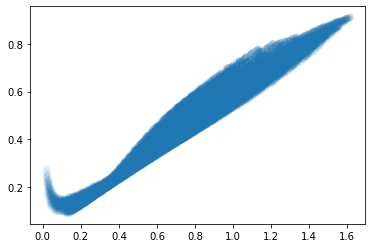

In [10]:
print(np.cov(l_params_scaled, rowvar = False))
#REALLy??
plt.scatter(l_params[:,0], l_params[:,2], alpha = 0.05)

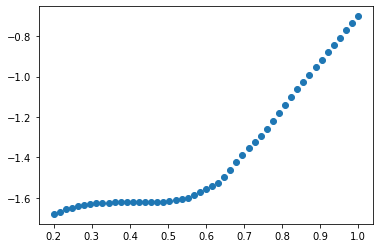

In [11]:
j_arr = []
lorenz = []
for i, (t1, t2, j) in enumerate(params):
    if t1 == -0.5 and t2 == 0.02:
        j_arr.append(j)
        lorenz.append(l_params_scaled[i])
        
lorenz = np.array(lorenz)
plt.scatter(j_arr, lorenz[:,2])

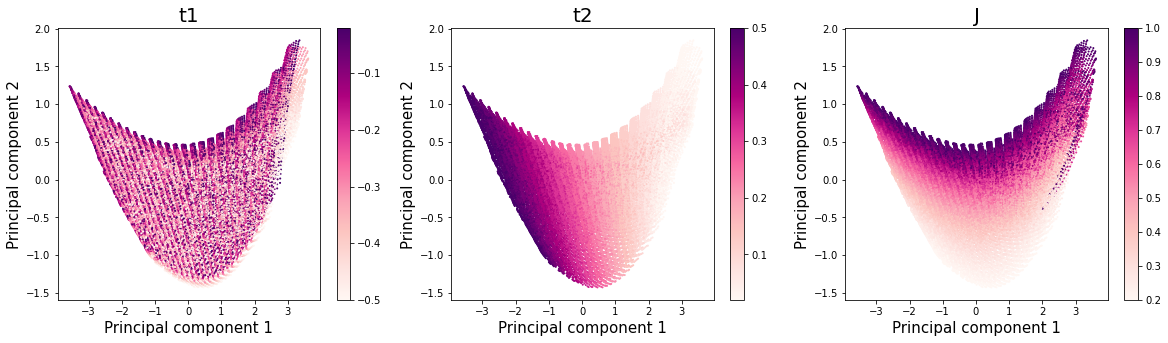

In [15]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
param_names = ['t1', 't2', 'J']

for i in range(3):
    c = ax[i].scatter(principals[:,0], principals[:,1], c=params[:,i], s=1, cmap=plt.cm.get_cmap('RdPu'))
    plt.colorbar(c, ax = ax[i])
    ax[i].set_title(param_names[i], size = 20)
    ax[i].set_xlabel("Principal component 1", size = 15)
    ax[i].set_ylabel("Principal component 2", size = 15)